In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
df = pd.read_excel('CPI_IncomePercentageIncrease_2017_2022.xlsx', sheet_name='Prediction')
df.head()

,Year,Quarters,Income,CPI
0,2017,Q1,1014.274524,130.340476
1,2017,Q2,1015.336190,131.009524
2,2017,Q3,1024.416190,131.161905
3,2017,Q4,1029.538095,131.842857
4,2018,Q1,1034.383333,133.047619


In [11]:
df

,Year,Quarters,Income,CPI
0,2017,Q1,1014.274524,130.340476
1,2017,Q2,1015.336190,131.009524
2,2017,Q3,1024.416190,131.161905
3,2017,Q4,1029.538095,131.842857
4,2018,Q1,1034.383333,133.047619
5,2018,Q2,1037.382857,134.119048
6,2018,Q3,1046.671429,134.816667
7,2018,Q4,1051.705476,134.473810
8,2019,Q1,1055.856667,134.961905
9,2019,Q2,1072.330952,136.745238


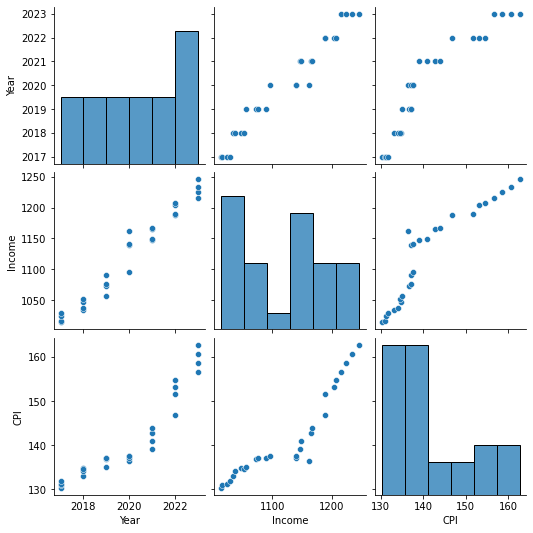

In [12]:
sns.pairplot(df)

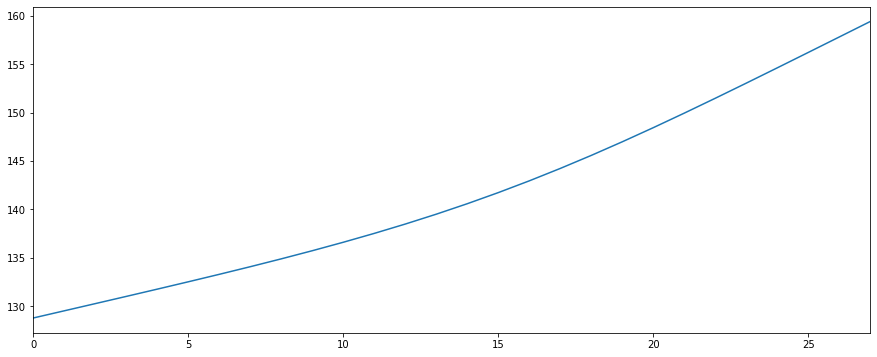

In [13]:
from statsmodels.tsa.filters.hp_filter import hpfilter
CPI_cycle,CPI_trend = hpfilter(df['CPI'], lamb=1600)
CPI_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

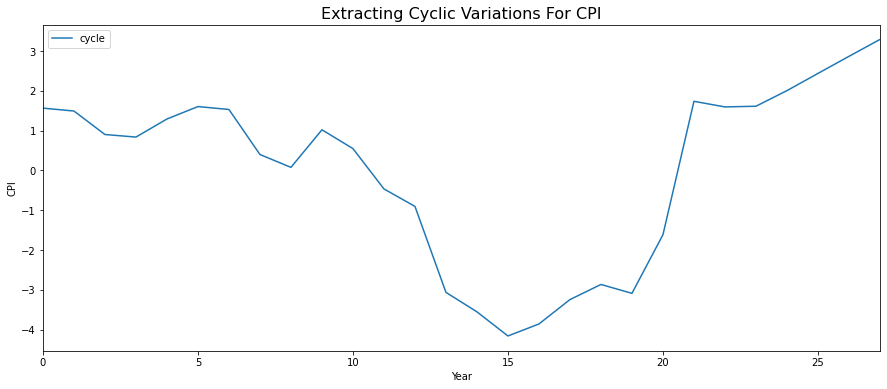

In [15]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
CPI_cycle,CPI_trend = hpfilter(df['CPI'], lamb=1600)
df['cycle'] =CPI_cycle
df['trend'] =CPI_trend
df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations For CPI', fontsize=16)
plt.xlabel('Year')
plt.ylabel('CPI')
plt.show()

In [16]:
df

,Year,Quarters,Income,CPI,cycle,trend
0,2017,Q1,1014.274524,130.340476,1.564809,128.775667
1,2017,Q2,1015.336190,131.009524,1.492415,129.517108
2,2017,Q3,1024.416190,131.161905,0.902377,130.259528
3,2017,Q4,1029.538095,131.842857,0.838021,131.004836
4,2018,Q1,1034.383333,133.047619,1.292112,131.755507
5,2018,Q2,1037.382857,134.119048,1.604507,132.514541
6,2018,Q3,1046.671429,134.816667,1.530924,133.285743
7,2018,Q4,1051.705476,134.473810,0.399888,134.073921
8,2019,Q1,1055.856667,134.961905,0.077062,134.884843
9,2019,Q2,1072.330952,136.745238,1.020715,135.724523


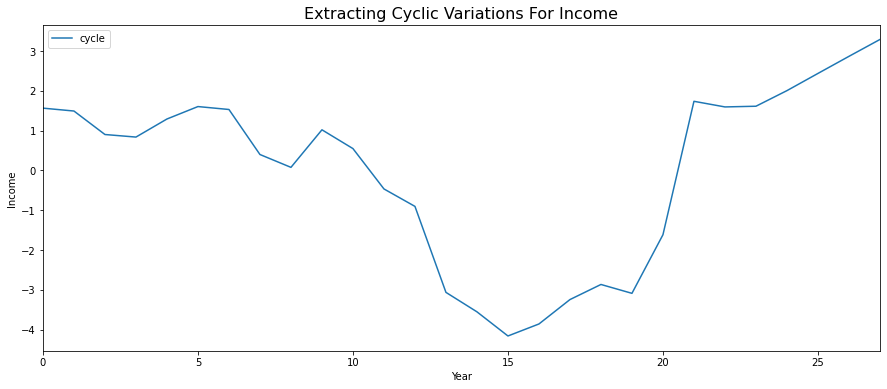

In [17]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
Income_cycle,Income_trend = hpfilter(df['Income'], lamb=1600)
df['cycleIncome'] =Income_cycle
df['trendIncome'] =Income_trend
df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations For Income', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Income')
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

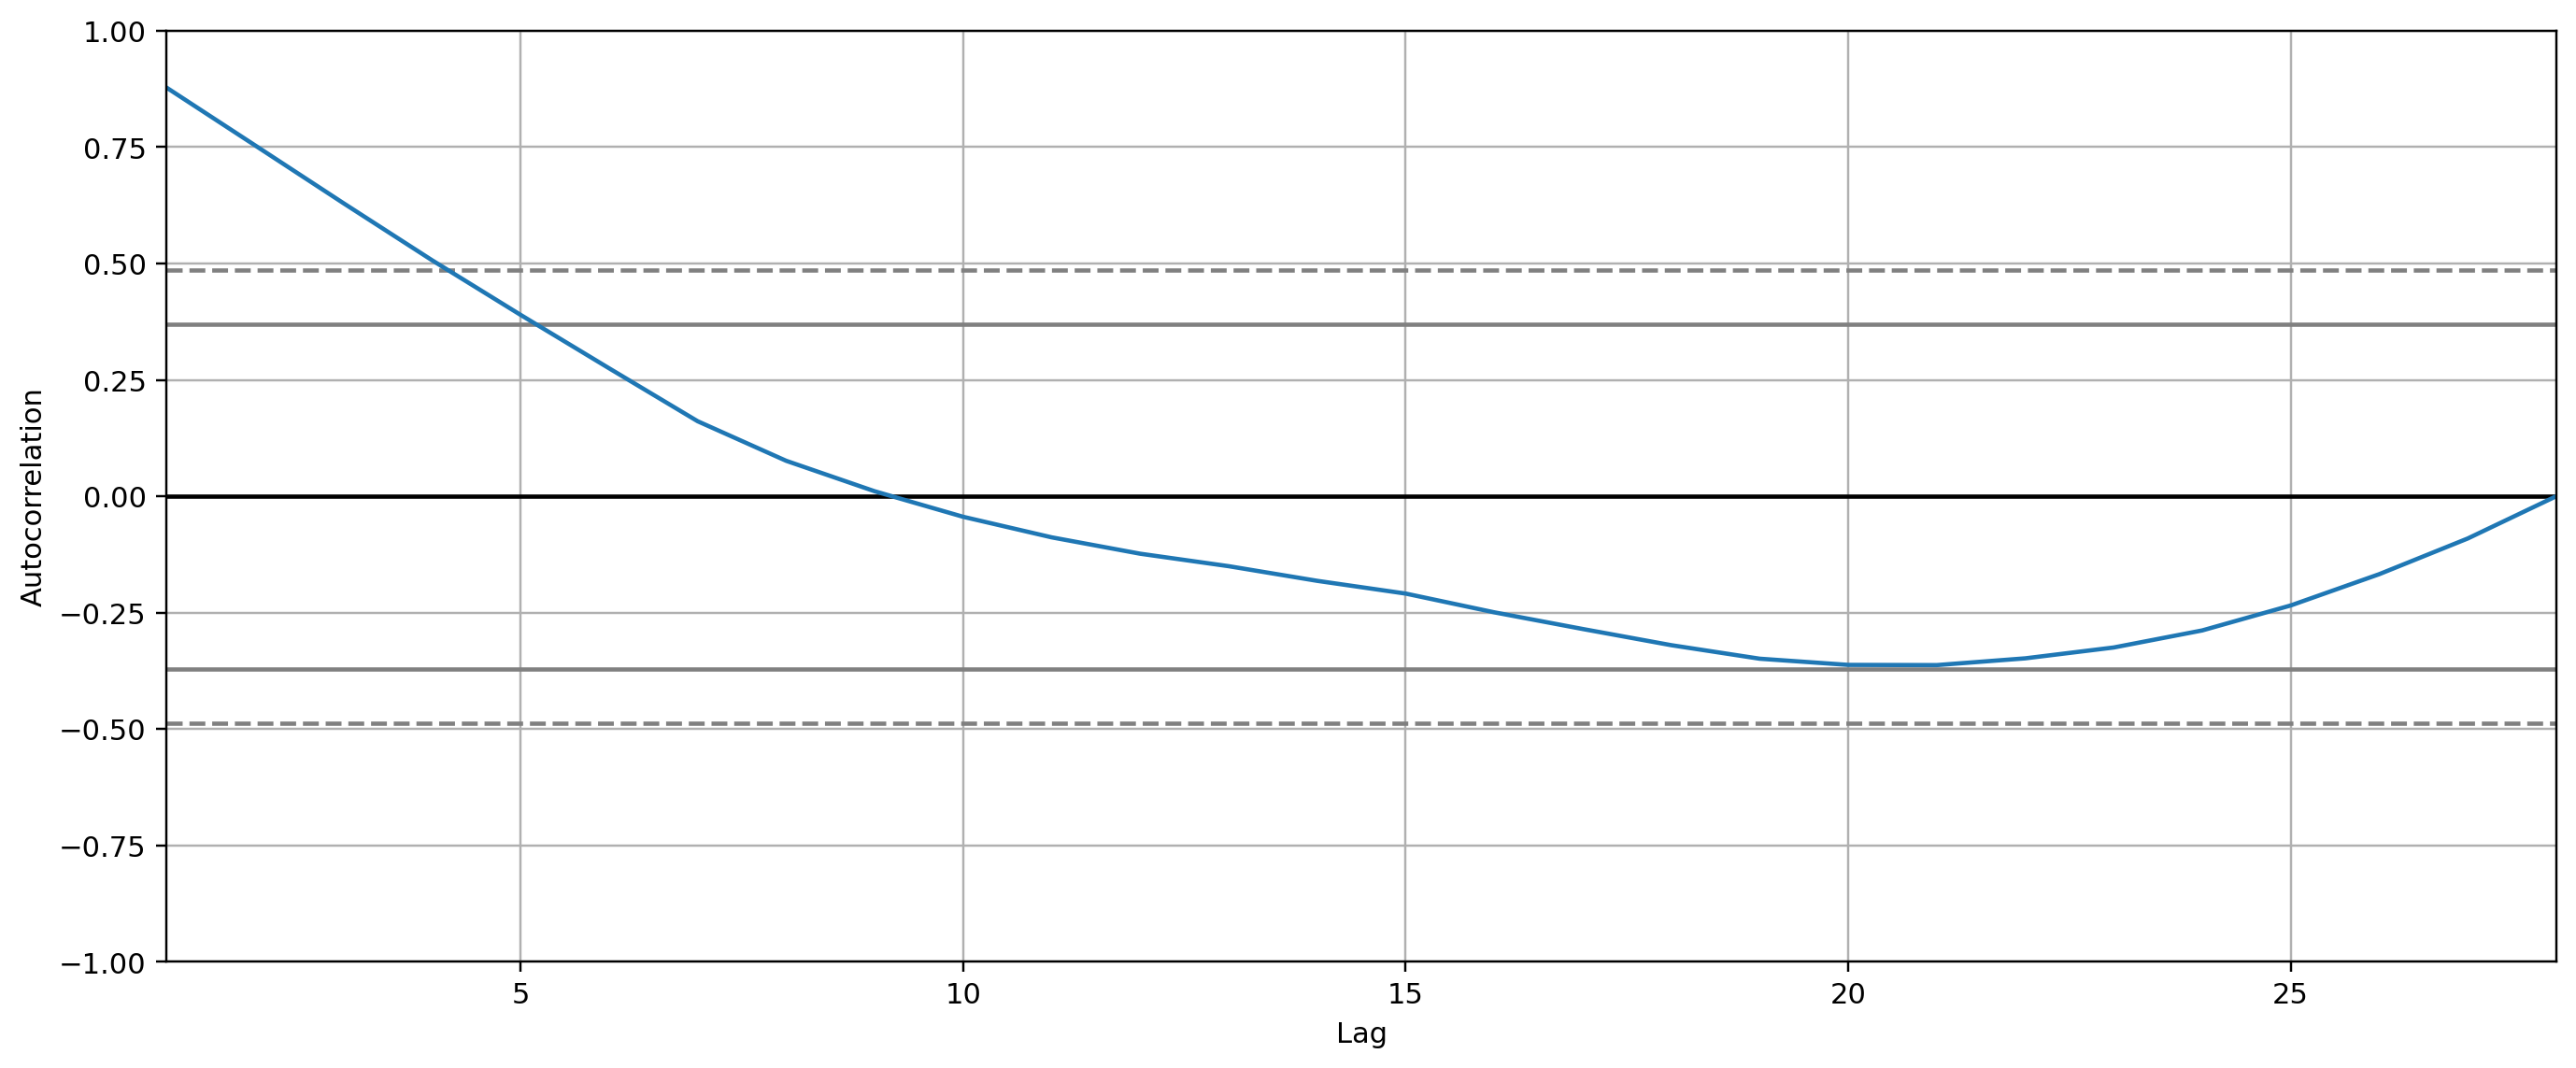

In [18]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':220})
autocorrelation_plot(df.CPI.tolist())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

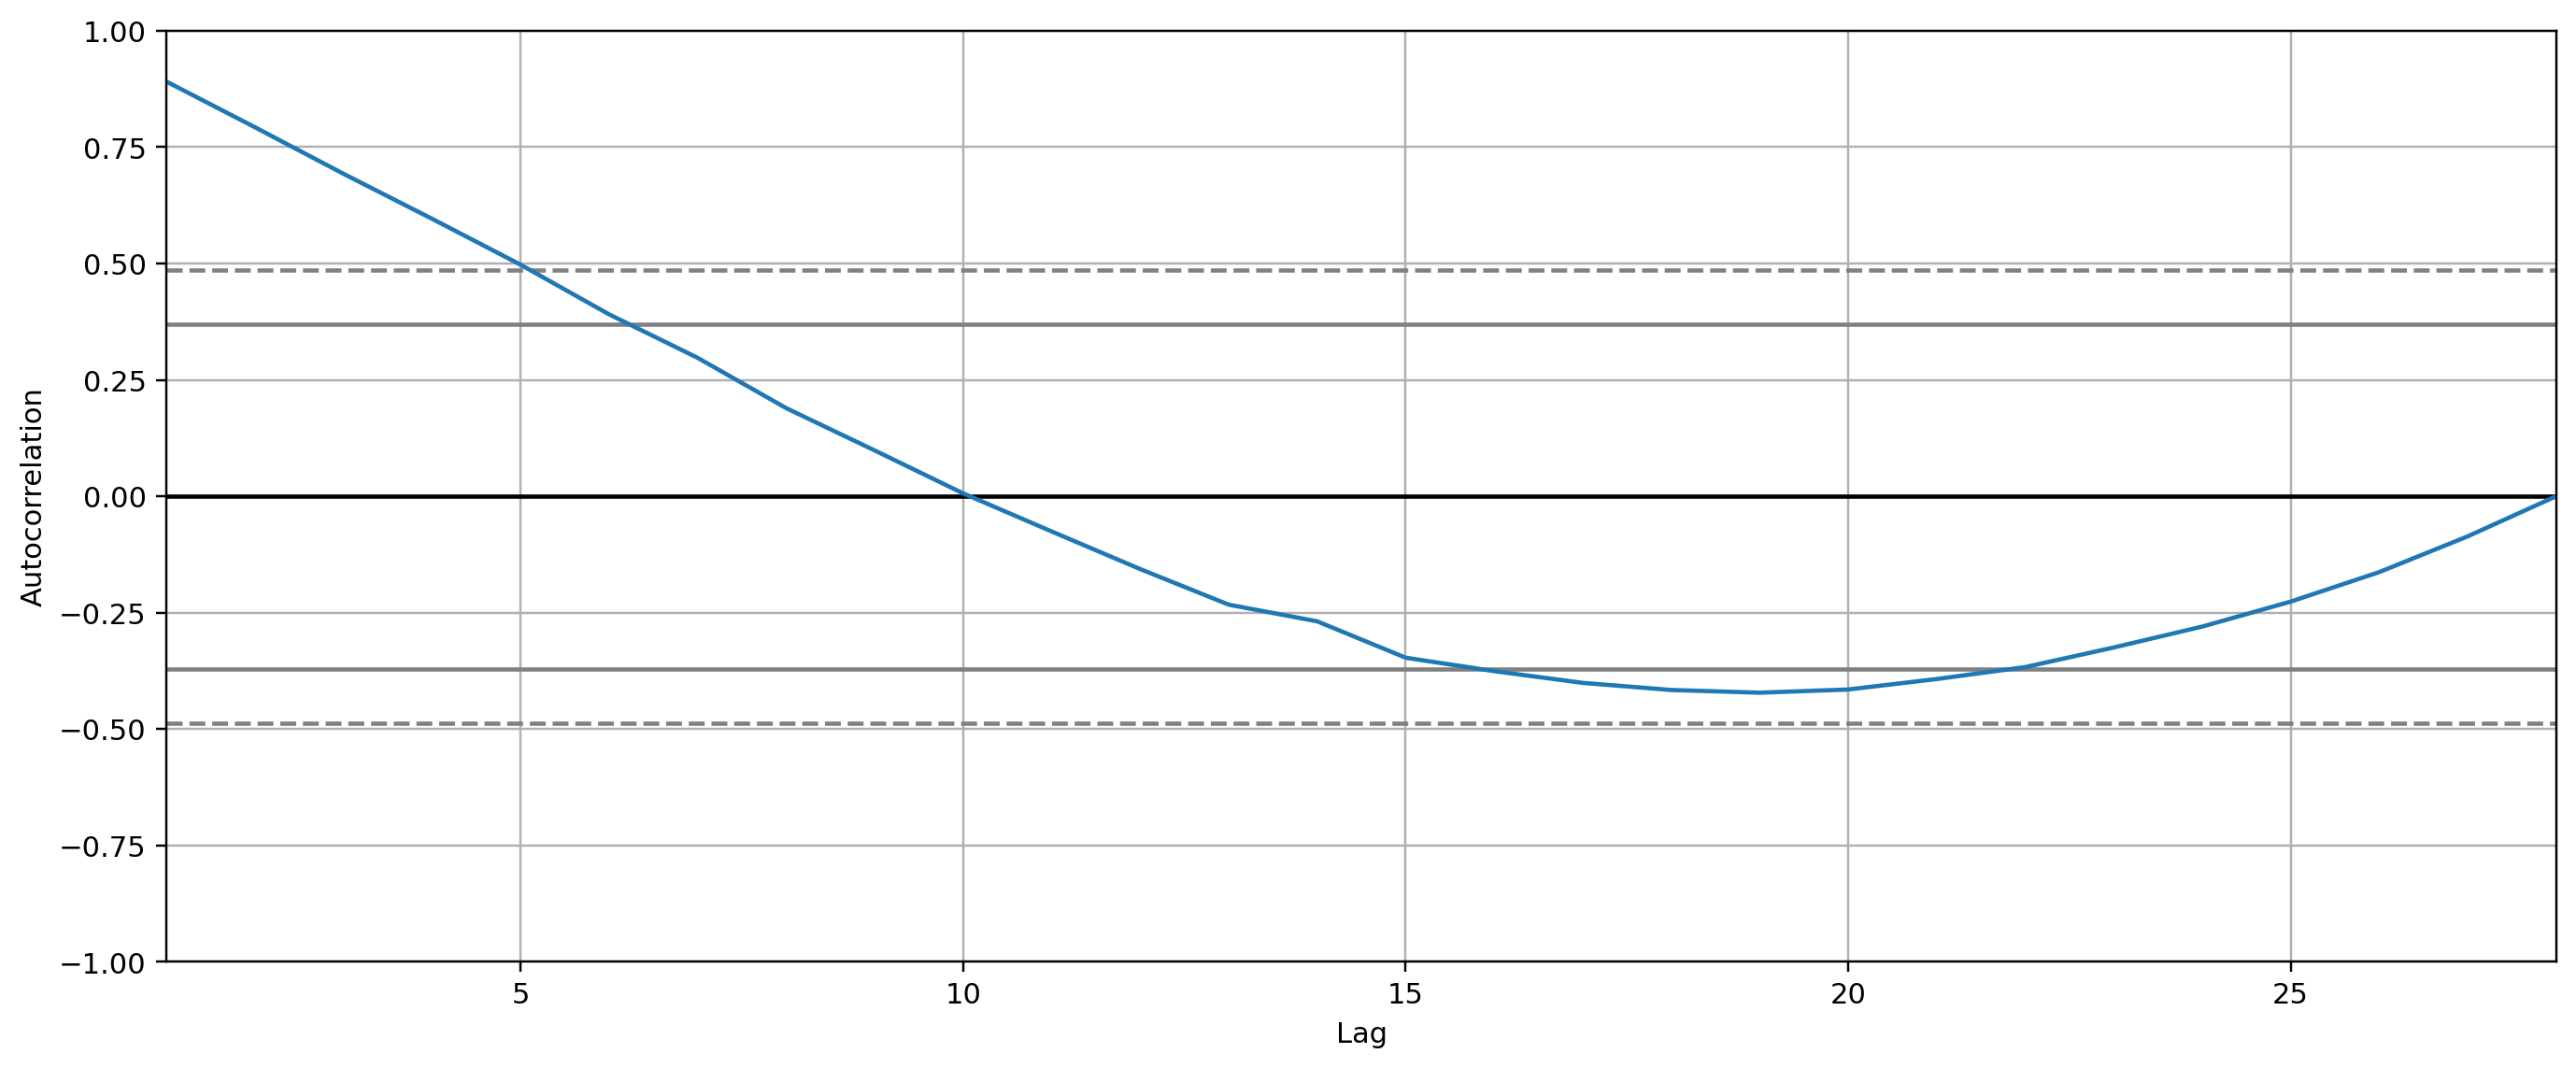

In [19]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':220})
autocorrelation_plot(df.Income.tolist())

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df3 = pd.read_excel('1410022301_databaseLoadingData2023.xlsx', sheet_name='final')
result = seasonal_decompose(df3['CPI'], period =df3.Year, model='add')
result.plot()
result = seasonal_decompose(df3['CPI'], period =df3.Year, model='mul')
result.plot()

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics

X = df['CPI']
test = X.iloc[-24:]
train = X.iloc[:-24]

def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    
resu = []
temp_df = pd.DataFrame()
for i in df.Income:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(24)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE']).head(3)    